In [1]:
#News classification problem (4 hours spent)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv('TrainingSet.csv',encoding_errors='ignore')

In [11]:
df.head()

,record_id,news_link,news_title,sys_news_type,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,https://www.google.com/url?rct=j&sa=t&url=http...,"FOMC Meeting, ADP Non Farm Dan ISM Manufacturi...",leadership,NaN,NaN,NaN
1,2,https://www.google.com/url?rct=j&sa=t&url=http...,Customer Service Representative in Chatham ON ...,partnership/alliance,NaN,NaN,NaN
2,4,https://www.google.com/url?rct=j&sa=t&url=http...,Wipro Acquires Phillippines Brand Splash,m&a,NaN,NaN,NaN
3,6,https://www.google.com/url?rct=j&sa=t&url=http...,Corient Capital Partners LLC Has $50000 Holdin...,finance,NaN,NaN,NaN
4,7,https://www.google.com/url?rct=j&sa=t&url=http...,Deutsche Bank ordered to tighten controls on m...,partnership/alliance,NaN,NaN,NaN


In [13]:
df=df[['record_id','news_link','news_title','sys_news_type']]

In [14]:
df.head()

,record_id,news_link,news_title,sys_news_type
0,1,https://www.google.com/url?rct=j&sa=t&url=http...,"FOMC Meeting, ADP Non Farm Dan ISM Manufacturi...",leadership
1,2,https://www.google.com/url?rct=j&sa=t&url=http...,Customer Service Representative in Chatham ON ...,partnership/alliance
2,4,https://www.google.com/url?rct=j&sa=t&url=http...,Wipro Acquires Phillippines Brand Splash,m&a
3,6,https://www.google.com/url?rct=j&sa=t&url=http...,Corient Capital Partners LLC Has $50000 Holdin...,finance
4,7,https://www.google.com/url?rct=j&sa=t&url=http...,Deutsche Bank ordered to tighten controls on m...,partnership/alliance


<AxesSubplot:xlabel='sys_news_type', ylabel='count'>

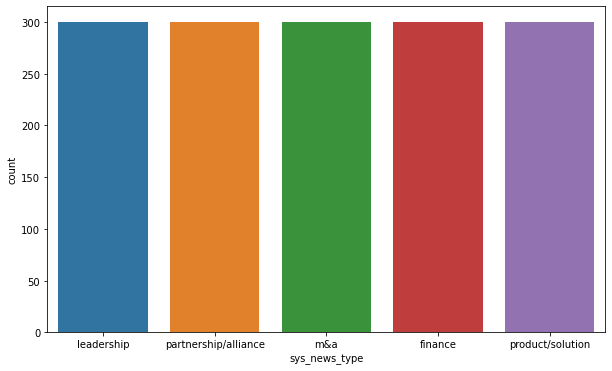

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['sys_news_type'])

In [17]:
df['sys_news_type'].value_counts()

leadership              300
partnership/alliance    300
m&a                     300
finance                 300
product/solution        300
Name: sys_news_type, dtype: int64

In [18]:
##as we can see we have balanced dataset , each category has 300 articles

In [19]:
df.isnull().sum()

record_id        0
news_link        0
news_title       0
sys_news_type    0
dtype: int64

In [20]:
##we do not have the null values , so we can start training our model

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [34]:
X = df['news_title']
y = df['sys_news_type']

In [35]:
cv= CountVectorizer()

In [36]:
X=cv.fit_transform(X)

In [38]:
X.shape

(1500, 4325)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
X_train

<1005x4325 sparse matrix of type '<class 'numpy.int64'>'
	with 10302 stored elements in Compressed Sparse Row format>

In [42]:
X_test

<495x4325 sparse matrix of type '<class 'numpy.int64'>'
	with 5133 stored elements in Compressed Sparse Row format>

In [43]:
y_train

591                      m&a
664     partnership/alliance
195                      m&a
1240                     m&a
1048                 finance
                ...         
1130        product/solution
1294        product/solution
860               leadership
1459              leadership
1126        product/solution
Name: sys_news_type, Length: 1005, dtype: object

In [44]:
y_test

1116                     m&a
1368                     m&a
422     partnership/alliance
413     partnership/alliance
451               leadership
                ...         
352                      m&a
937         product/solution
1295        product/solution
1392                     m&a
1300                     m&a
Name: sys_news_type, Length: 495, dtype: object

In [45]:
##training the model

In [46]:
model = MultinomialNB()

In [47]:
model

MultinomialNB()

In [48]:
model.fit(X_train, y_train)

MultinomialNB()

In [49]:
preds = model.predict(X_test)

In [50]:
#checking the quality of the model

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,preds))

                      precision    recall  f1-score   support

             finance       0.66      0.86      0.75        92
          leadership       0.97      0.88      0.92       111
                 m&a       0.82      0.71      0.76        90
partnership/alliance       0.60      0.92      0.73       103
    product/solution       0.71      0.27      0.39        99

            accuracy                           0.73       495
           macro avg       0.75      0.73      0.71       495
        weighted avg       0.76      0.73      0.71       495



In [ ]:
#based on the classification report we can see that our model is 73% accurate

In [55]:
#so now we can use whole traning dataset as training one and redo the tasks 
#shown above on dataset that has to be classified 

In [56]:
df.head()

,record_id,news_link,news_title,sys_news_type
0,1,https://www.google.com/url?rct=j&sa=t&url=http...,"FOMC Meeting, ADP Non Farm Dan ISM Manufacturi...",leadership
1,2,https://www.google.com/url?rct=j&sa=t&url=http...,Customer Service Representative in Chatham ON ...,partnership/alliance
2,4,https://www.google.com/url?rct=j&sa=t&url=http...,Wipro Acquires Phillippines Brand Splash,m&a
3,6,https://www.google.com/url?rct=j&sa=t&url=http...,Corient Capital Partners LLC Has $50000 Holdin...,finance
4,7,https://www.google.com/url?rct=j&sa=t&url=http...,Deutsche Bank ordered to tighten controls on m...,partnership/alliance


In [58]:
df2 = pd.read_csv('TestSet.csv',encoding_errors='ignore')

In [59]:
df2.head()

,record_id,news_link,news_title,sys_news_type
0,1,https://www.google.com/url?rct=j&sa=t&url=http...,"FOMC Meeting, ADP Non Farm Dan ISM Manufacturi...",NaN
1,2,https://www.google.com/url?rct=j&sa=t&url=http...,Customer Service Representative in Chatham ON ...,NaN
2,3,https://www.google.com/url?rct=j&sa=t&url=http...,"50% H1B Applications By TCS, HCL, Infosys, Wip...",NaN
3,4,https://www.google.com/url?rct=j&sa=t&url=http...,Wipro Acquires Phillippines Brand Splash,NaN
4,5,https://www.google.com/url?rct=j&sa=t&url=http...,"Software Engineer Jobs in Chantilly, VA",NaN


In [61]:
X = df['news_title']

In [62]:
X = cv.fit_transform(X)

In [63]:
X

<1500x4325 sparse matrix of type '<class 'numpy.int64'>'
	with 15435 stored elements in Compressed Sparse Row format>

In [64]:
X_train = X
y_train = df['sys_news_type']

In [65]:
y_train

0                 leadership
1       partnership/alliance
2                        m&a
3                    finance
4       partnership/alliance
                ...         
1495        product/solution
1496        product/solution
1497                     m&a
1498              leadership
1499        product/solution
Name: sys_news_type, Length: 1500, dtype: object

In [66]:
model.fit(X_train,y_train)

MultinomialNB()

In [70]:
X_test = cv.transform(df2['news_title'])

In [72]:
X_test.shape

(4981, 4325)

In [73]:
preds = model.predict(X_test)

In [76]:
preds

array(['leadership', 'partnership/alliance', 'm&a', ...,
       'partnership/alliance', 'm&a', 'product/solution'], dtype='<U20')

In [82]:
preds_df = pd.DataFrame(preds)

In [91]:
preds_df=preds_df.rename(columns={0:'sys_new_predicted'})

In [92]:
df2['sys_news_type']=preds_df['sys_new_predicted']

In [93]:
df2.head()

,record_id,news_link,news_title,sys_news_type
0,1,https://www.google.com/url?rct=j&sa=t&url=http...,"FOMC Meeting, ADP Non Farm Dan ISM Manufacturi...",leadership
1,2,https://www.google.com/url?rct=j&sa=t&url=http...,Customer Service Representative in Chatham ON ...,partnership/alliance
2,3,https://www.google.com/url?rct=j&sa=t&url=http...,"50% H1B Applications By TCS, HCL, Infosys, Wip...",m&a
3,4,https://www.google.com/url?rct=j&sa=t&url=http...,Wipro Acquires Phillippines Brand Splash,m&a
4,5,https://www.google.com/url?rct=j&sa=t&url=http...,"Software Engineer Jobs in Chantilly, VA",product/solution


In [94]:
df2['sys_news_type'].value_counts()

partnership/alliance    1825
m&a                      839
product/solution         816
leadership               797
finance                  704
Name: sys_news_type, dtype: int64

<AxesSubplot:xlabel='sys_news_type', ylabel='count'>

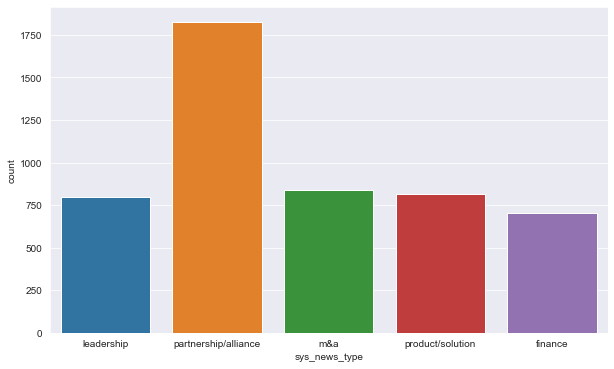

In [98]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(x=df2['sys_news_type'])

In [102]:
df2.to_csv('C:/Users/DZCH0CV/Desktop/Python Practical Projects/classified_data.csv')